# Visualization of roadmaps in the basic scenario (Figure 4)

- strategies: random, grid, SPARS, square, CTRMs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import os
import pickle
import tqdm

from ctrm.roadmap import *
from ctrm.roadmap_learned import get_timed_roadmaps_multiple_paths_with_learned_indicator
from ctrm.viz import simple_plot_2d
from ctrm.utils import set_global_seeds
from ctrm.planner import PrioritizedPlanning as PP
from ctrm.environment.instance import generate_ins_2d_with_obs_hetero_nonfix_agents

<BarContainer object of 10 artists>

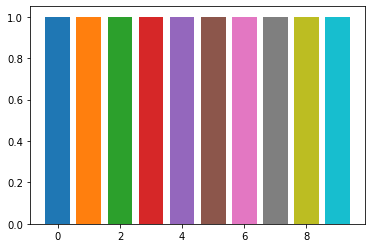

In [2]:
COLORS = list(mcolors.TABLEAU_COLORS.values())
plt.bar(range(len(COLORS)), [1]*len(COLORS), color=COLORS)

# get one instance

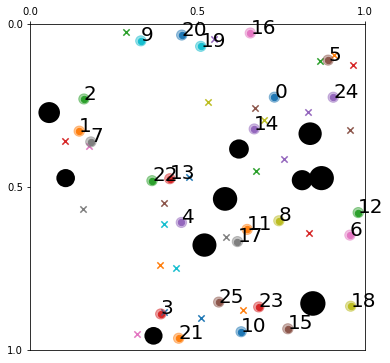

In [3]:
set_global_seeds(0)

ins = generate_ins_2d_with_obs_hetero_nonfix_agents(
    num_agents_min=21,
    num_agents_max=30,
    max_speeds_cands=[0.03125],
    rads_cands=[0.015625],
    obs_num=10,
    obs_size_lower_bound=0.05,
    obs_size_upper_bound=0.08,
)
simple_plot_2d(ins, output_size=6)

# utilities

In [5]:
def plot_trm_onestep(ins, trms, res, output_size=2):
    if res.solved is False:
        return
    
    fig = plt.figure(figsize=(output_size, output_size))
    ax = fig.add_subplot(1, 1, 1)
    
    agent = 0
    trm = trms[agent]
    
    # obstacles
    for o in ins.obs:
        ax.add_patch(plt.Circle(o.pos, o.rad, fc="black", alpha=1))
        
    # start and goal
    color = "#03A9F4"
    s = ins.starts[agent]
    g = ins.goals[agent]
    rad = ins.rads[agent]
    ax.add_patch(plt.Circle(s, rad, fc=color, alpha=1, ec=color))
    ax.scatter([g[0]], [g[1]], marker="s", color=color, s=40)
    
    # roadmap
    color = "gray"
    locs = np.array([v.pos for v in trm.V[1]])
    X, Y = locs[:, 0], locs[:, 1]
    for i, neighbors in enumerate(trm.E[1]):
        for j in neighbors:
            if j <= i: continue
            ax.plot([X[i], X[j]], [Y[i], Y[j]], color=color, linewidth=0.5)
            
    # path
    color = "#03A9F4"
    path = res.paths[0]
    s = path[0].pos
    g = path[-1].pos
    path_numpy = np.array([ v.pos for v in path ])
    ax.plot(path_numpy[:,0], path_numpy[:,1], color=color, linewidth=3, alpha=1)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()
    ax.xaxis.tick_top()

In [6]:
def plot_trm_ctrm(ins, trms, res, output_size=2):
    agent = 0
    
    fig = plt.figure(figsize=(output_size, output_size))
    ax = fig.add_subplot(1, 1, 1)

    # obstacles
    for o in ins.obs:
        ax.add_patch(plt.Circle(o.pos, o.rad, fc="black", alpha=1))
    
    # start and goal
    color = "#03A9F4"
    s = ins.starts[agent]
    g = ins.goals[agent]
    rad = ins.rads[agent]
    ax.add_patch(plt.Circle(s, rad, fc=color, alpha=1, ec=color))
    ax.scatter([g[0]], [g[1]], marker="s", color=color, s=40)
    
    # roadmap
    color = "gray"
    trm = trms[agent]
    T = len(trm.V) - 1
    for t in range(0, T):
        locs_t0 = np.array([v.pos for v in trm.V[t]])
        X_t0, Y_t0 = locs_t0[:, 0], locs_t0[:, 1]
        locs_t1 = np.array([v.pos for v in trm.V[t + 1]])
        X_t1, Y_t1 = locs_t1[:, 0], locs_t1[:, 1]
        for i, neighbors in enumerate(trm.E[t]):
            for j in neighbors:
                ax.plot([X_t0[i], X_t1[j]], [Y_t0[i], Y_t1[j]], color=color, linewidth=0.5, alpha=1)
                
    # path
    color = "#03A9F4"
    path = res.paths[0]
    s = path[0].pos
    g = path[-1].pos
    path_numpy = np.array([ v.pos for v in path ])
    ax.plot(path_numpy[:,0], path_numpy[:,1], color=color, linewidth=3, alpha=1)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()
    ax.xaxis.tick_top()

In [7]:
def savefig(filename):
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.05)

# grid

In [7]:
%%time
trms_grid = get_timed_roadmaps_grid_common(ins, T=64, size=32)

CPU times: user 3.75 s, sys: 124 ms, total: 3.87 s
Wall time: 3.85 s


In [8]:
planner = PP(ins, trms_grid, time_limit=300, verbose=1)
res = planner.solve()
res.get_dict_wo_paths()

22/01/12 05:08:41 | INFO     | planner.py       | info             | L080 | _solve is started, time_limit: 300 sec
22/01/12 05:08:41 | INFO     | planner.py       | info             | L080 | agent-0 starts planning
22/01/12 05:08:41 | INFO     | planner.py       | info             | L080 | agent-1 starts planning
22/01/12 05:08:41 | INFO     | planner.py       | info             | L080 | agent-2 starts planning
22/01/12 05:08:41 | INFO     | planner.py       | info             | L080 | agent-3 starts planning
22/01/12 05:08:42 | INFO     | planner.py       | info             | L080 | agent-4 starts planning
22/01/12 05:08:42 | INFO     | planner.py       | info             | L080 | agent-5 starts planning
22/01/12 05:08:42 | INFO     | planner.py       | info             | L080 | agent-6 starts planning
22/01/12 05:08:42 | INFO     | planner.py       | info             | L080 | agent-7 starts planning
22/01/12 05:08:42 | INFO     | planner.py       | info             | L080 | agent-8 s

{'solved': True,
 'name_planner': 'PrioritizedPlanning',
 'elapsed_planner': 13.599716424942017,
 'sum_of_costs': 811,
 'maximum_costs': 40,
 'sum_of_travel_dists': 21.779038129045702,
 'maximum_travel_dists': 1.242594841558996,
 'cnt_static_collide': 0,
 'cnt_continuous_collide': 2175437,
 'elapsed_static_collide': 0,
 'elapsed_continuous_collide': 5.5406036376953125,
 'lowlevel_expanded': 126247,
 'lowlevel_explored': 105224}

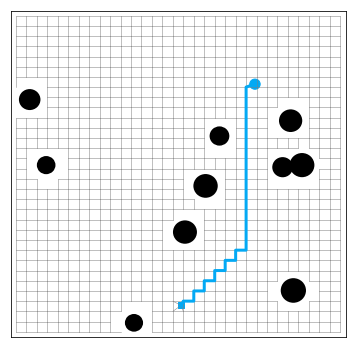

In [9]:
plot_trm_onestep(ins, trms_grid, res, output_size=6)
savefig("fig/roadmap_grid.pdf")

# random

In [10]:
%%time
trms_random = get_timed_roadmaps_random_common(ins, T=64, num=3000)

CPU times: user 16 s, sys: 436 ms, total: 16.4 s
Wall time: 16.4 s


In [11]:
planner = PP(ins, trms_random, time_limit=300, verbose=1)
res_random = planner.solve()
res_random.get_dict_wo_paths()

21/10/06 07:50:57 | INFO     | planner.py       | info             | L059 | _solve is started, time_limit: 300 sec
21/10/06 07:50:57 | INFO     | planner.py       | info             | L059 | agent-0 starts planning
21/10/06 07:50:57 | INFO     | planner.py       | info             | L059 | agent-1 starts planning
21/10/06 07:50:57 | INFO     | planner.py       | info             | L059 | agent-2 starts planning
21/10/06 07:50:58 | INFO     | planner.py       | info             | L059 | agent-3 starts planning
21/10/06 07:50:58 | INFO     | planner.py       | info             | L059 | agent-4 starts planning
21/10/06 07:50:59 | INFO     | planner.py       | info             | L059 | agent-5 starts planning
21/10/06 07:50:59 | INFO     | planner.py       | info             | L059 | agent-6 starts planning
21/10/06 07:50:59 | INFO     | planner.py       | info             | L059 | agent-7 starts planning
21/10/06 07:51:00 | INFO     | planner.py       | info             | L059 | agent-8 s

{'solved': True,
 'name_planner': 'PrioritizedPlanning',
 'elapsed_planner': 37.46705389022827,
 'sum_of_costs': 762,
 'maximum_costs': 43,
 'sum_of_travel_dists': 19.540547642189335,
 'maximum_travel_dists': 1.136597841862953,
 'cnt_static_collide': 0,
 'cnt_continuous_collide': 8514707,
 'elapsed_static_collide': 0,
 'elapsed_continuous_collide': 14.633643865585327,
 'lowlevel_expanded': 433872,
 'lowlevel_explored': 369238}

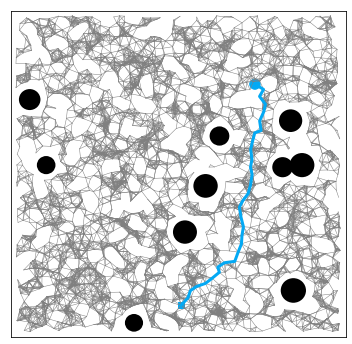

In [12]:
plot_trm_onestep(ins, trms_random, res_random, output_size=6)
savefig("fig/roadmap_random.pdf")

# spars

In [13]:
%%time
trms_spars = get_timed_roadamaps_SPARS_2d_common(ins, T=90, sparse_delta_fraction=0.1, dense_delta_fraction=0.01, stretch_factor=1.3, time_limit_sec=60)

CPU times: user 1min 20s, sys: 2.87 s, total: 1min 22s
Wall time: 1min 22s


In [14]:
planner = PP(ins, trms_spars, time_limit=300, verbose=1)
res_spars = planner.solve()
res_spars.get_dict_wo_paths()

21/10/06 07:53:22 | INFO     | planner.py       | info             | L059 | _solve is started, time_limit: 300 sec
21/10/06 07:53:22 | INFO     | planner.py       | info             | L059 | agent-0 starts planning
21/10/06 07:53:22 | INFO     | planner.py       | info             | L059 | agent-1 starts planning
21/10/06 07:53:23 | INFO     | planner.py       | info             | L059 | agent-2 starts planning
21/10/06 07:53:25 | INFO     | planner.py       | info             | L059 | agent-3 starts planning
21/10/06 07:53:28 | INFO     | planner.py       | info             | L059 | agent-4 starts planning
21/10/06 07:53:31 | INFO     | planner.py       | info             | L059 | agent-5 starts planning
21/10/06 07:53:33 | INFO     | planner.py       | info             | L059 | agent-6 starts planning
21/10/06 07:53:37 | INFO     | planner.py       | info             | L059 | agent-7 starts planning
21/10/06 07:53:42 | INFO     | planner.py       | info             | L059 | agent-8 s

{'solved': True,
 'name_planner': 'PrioritizedPlanning',
 'elapsed_planner': 203.06777906417847,
 'sum_of_costs': 1158,
 'maximum_costs': 83,
 'sum_of_travel_dists': 27.767830040247386,
 'maximum_travel_dists': 1.8901865350676859,
 'cnt_static_collide': 0,
 'cnt_continuous_collide': 40903227,
 'elapsed_static_collide': 0,
 'elapsed_continuous_collide': 76.26908755302429,
 'lowlevel_expanded': 2713928,
 'lowlevel_explored': 2561245}

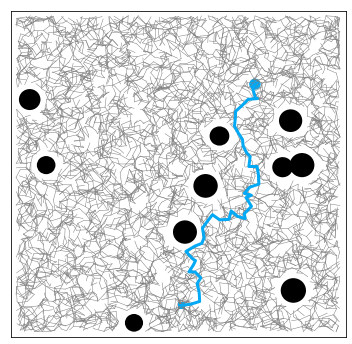

In [15]:
plot_trm_onestep(ins, trms_spars, res_spars, output_size=6)
savefig("fig/roadmap_spars.pdf")

# square

In [16]:
%%time
trms_rect = get_timed_roadmaps_random_rect(ins, T=64, sample_rate_vs_diag_speed=75, margin_rate_vs_speed=5)

CPU times: user 52 s, sys: 696 ms, total: 52.7 s
Wall time: 52.6 s


In [17]:
planner = PP(ins, trms_rect, time_limit=300, verbose=1)
res_rect = planner.solve()
res_rect.get_dict_wo_paths()

21/10/06 07:57:51 | INFO     | planner.py       | info             | L059 | _solve is started, time_limit: 300 sec
21/10/06 07:57:51 | INFO     | planner.py       | info             | L059 | agent-0 starts planning
21/10/06 07:57:51 | INFO     | planner.py       | info             | L059 | agent-1 starts planning
21/10/06 07:57:51 | INFO     | planner.py       | info             | L059 | agent-2 starts planning
21/10/06 07:57:51 | INFO     | planner.py       | info             | L059 | agent-3 starts planning
21/10/06 07:57:52 | INFO     | planner.py       | info             | L059 | agent-4 starts planning
21/10/06 07:57:52 | INFO     | planner.py       | info             | L059 | agent-5 starts planning
21/10/06 07:57:53 | INFO     | planner.py       | info             | L059 | agent-6 starts planning
21/10/06 07:57:53 | INFO     | planner.py       | info             | L059 | agent-7 starts planning
21/10/06 07:57:54 | INFO     | planner.py       | info             | L059 | agent-8 s

{'solved': True,
 'name_planner': 'PrioritizedPlanning',
 'elapsed_planner': 37.67642569541931,
 'sum_of_costs': 595,
 'maximum_costs': 44,
 'sum_of_travel_dists': 15.10704991067968,
 'maximum_travel_dists': 1.1440378864387664,
 'cnt_static_collide': 0,
 'cnt_continuous_collide': 8411880,
 'elapsed_static_collide': 0,
 'elapsed_continuous_collide': 15.328104734420776,
 'lowlevel_expanded': 337239,
 'lowlevel_explored': 297629}

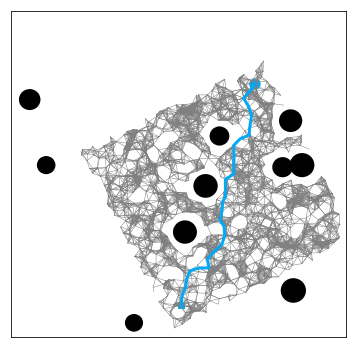

In [18]:
plot_trm_onestep(ins, trms_rect, res_rect, output_size=6)
savefig("fig/roadmap_rect.pdf")

# CTRM

In [4]:
%%time
pred_basename = "/workspace/trained_models/aamas22-main/best"

set_global_seeds(0)
trms_ctrm = get_timed_roadmaps_multiple_paths_with_learned_indicator(
    ins=ins,
    pred_basename=pred_basename, 
    N_traj=25,
    prob_uniform_sampling_after_goal=0.9,
    prob_uniform_bias=0,
    prob_uniform_gamma=5.0,
    max_T=64,
    max_attempt=3,
    merge_distance_rate=0.1,
    verbose=1,
)

roadmap_gen: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s]


CPU times: user 2min 13s, sys: 5.68 s, total: 2min 18s
Wall time: 18.5 s


In [8]:
planner = PP(ins, trms_ctrm, time_limit=300, verbose=1)
res_ctrm = planner.solve()
res_ctrm.get_dict_wo_paths()

22/01/14 02:55:00 | INFO     | planner.py       | info             | L085 | _solve is started, time_limit: 300 sec
22/01/14 02:55:00 | INFO     | planner.py       | info             | L085 | agent-0 starts planning
22/01/14 02:55:00 | INFO     | planner.py       | info             | L085 | agent-1 starts planning
22/01/14 02:55:00 | INFO     | planner.py       | info             | L085 | agent-2 starts planning
22/01/14 02:55:00 | INFO     | planner.py       | info             | L085 | agent-3 starts planning
22/01/14 02:55:00 | INFO     | planner.py       | info             | L085 | agent-4 starts planning
22/01/14 02:55:00 | INFO     | planner.py       | info             | L085 | agent-5 starts planning
22/01/14 02:55:00 | INFO     | planner.py       | info             | L085 | agent-6 starts planning
22/01/14 02:55:00 | INFO     | planner.py       | info             | L085 | agent-7 starts planning
22/01/14 02:55:00 | INFO     | planner.py       | info             | L085 | agent-8 s

{'solved': True,
 'name_planner': 'PrioritizedPlanning',
 'elapsed_planner': 5.2026207447052,
 'sum_of_costs': 550,
 'maximum_costs': 39,
 'sum_of_travel_dists': 14.793080304205246,
 'maximum_travel_dists': 1.0401629786056967,
 'cnt_static_collide': 0,
 'cnt_continuous_collide': 284016,
 'elapsed_static_collide': 0,
 'elapsed_continuous_collide': 2.490995168685913,
 'lowlevel_expanded': 17968,
 'lowlevel_explored': 16969}

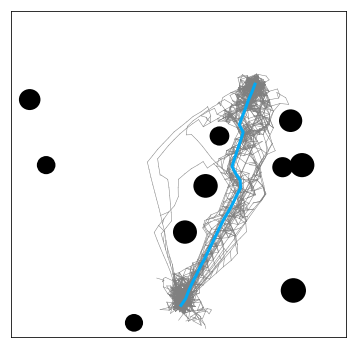

In [9]:
plot_trm_ctrm(ins, trms_ctrm, res_ctrm, output_size=6)
savefig("fig/roadmap_ctrm.pdf")